# Introduction

Amazon is a diverse online retailer with a wide selection of products, from electronics and fashion to home goods. 
It provides convenient shopping experiences with fast shipping, reliable customer service, and secure transactions


![](https://www.performics.com/in/wp-content/uploads/sites/6/2023/06/amazon-3.jpg)

# What is the problem?

The online retail market is fiercely competitive. Understanding customer preferences, product performance, and market trends can help a retailer stay ahead. The problem here is to analyze the dataset to extract insights that can help in enhancing product visibility, improving customer satisfaction, and eventually, increasing sales.

# Why is it important to be solved?

Solving this problem will not only help in increasing sales but will also enhance the customer's shopping experience. It can aid in personalized marketing, improving product placements, and optimizing the product portfolio, thereby leading to increased customer loyalty and higher profits.

# Data Dictionary

* **product_id:** The unique identifier for each product.
* **product_name:** The name of the product.
* **category:** The category under which the product is listed, further divided into sub-categories separated by "|".
* **discounted_price:** The price of the product after applying the discount.
* **actual_price:** The original price of the product without any discount.
* **discount_percentage:** The percentage of discount offered on the product.
* **rating:** The average rating given to the product by the customers.
* **rating_count:** The number of ratings the product received.
* **about_product:** A brief description of the product.
* **user_id:** The unique identifiers for users who reviewed the product, separated by commas.
* **user_name:** The names of users who reviewed the product, separated by commas.
* **review_id:** The unique identifiers for the reviews, separated by commas.
* **review_title:** The titles of the reviews, separated by commas.
* **review_content:** The content of the reviews, separated by commas.
* **img_link:** The link to the image of the product.
* **product_link:** The link to the product's page on Amazon.



# Questions that this case study is trying to solve.

**Discount Analysis**
How does the discount percentage affect the rating of a product?

**Category Analysis**
Which category has the highest average rating?

**Price Analysis**
Is there a correlation between the product's price and its rating?

**Rating Analysis**
What is the distribution of ratings across all products?

**Product Analysis**
Which product has the highest number of reviews and what is its rating?

**User Analysis**
Identify the top 5 users who have given the most reviews?

**Review Length Analysis**
Is there a correlation between the length of a review and the rating given?

**Product Description Analysis**
Can the length of the product description be correlated to the product's rating?


In [33]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [34]:
#Reading the file
df = pd.read_csv(r"/kaggle/input/amazon-sales-dataset/Amazon.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
1,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,"₹1,339",44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...
3,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics|GeneralPurposeBatteries&BatteryCha...,₹399,₹499,20%,4.3,"27,201",Duracell Rechargeable AAA 750mAh batteries sta...,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...","R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...","Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",https://m.media-amazon.com/images/I/418YrbHVLC...,https://www.amazon.in/Duracell-AAA-750mAh-Rech...
4,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories|Accessories&Peripherals|...,₹279,₹375,26%,4.3,"31,534","A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,https://www.amazon.in/Logitech-B100-Optical-Mo...


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

From the above output, we can note two things. The first one is the datatype of each attribute, and the second one is the number of non-null values.

In [36]:
df.isnull().sum() #checking null values

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

There are two null values in the rating_count column, so we have to fix this.

In [37]:
df['rating_count'].fillna(0, inplace = True) # filling null values of rating count with zero

Since the rating_count column contains the number of ratings, if the rating_count is null, it means the product has a zero rating, so changing it to zero makes more sense.

In [38]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

now there are no null values

In [39]:
df.duplicated().sum() #checking whether our dataset has duplicated values or not

0

No duplicate values were found. Now let's change the datatype of some attributes to the appropriate datatype.

In [40]:
df["discounted_price"] = df["discounted_price"].str.replace("₹", "").str.replace(",", "").astype("float")
df["discounted_price"]

0        507.0
1        507.0
2        749.0
3        399.0
4        279.0
         ...  
1460     259.0
1461    1299.0
1462     279.0
1463     249.0
1464    1439.0
Name: discounted_price, Length: 1465, dtype: float64

In [41]:
df["actual_price"] = df["actual_price"].str.replace("₹", "").str.replace(",", "").astype("float")
df["actual_price"]

0       1208.0
1       1208.0
2       1339.0
3        499.0
4        375.0
         ...  
1460     999.0
1461    2495.0
1462     499.0
1463     999.0
1464    1999.0
Name: actual_price, Length: 1465, dtype: float64

In [42]:
df["discount_percentage"] = df["discount_percentage"].str.replace("%", "").astype("float")
df["discount_percentage"]

0       58.0
1       58.0
2       44.0
3       20.0
4       26.0
        ... 
1460    74.0
1461    48.0
1462    44.0
1463    75.0
1464    28.0
Name: discount_percentage, Length: 1465, dtype: float64

In [43]:
df["rating"] = df["rating"].replace("|", "0").astype("float")
df["rating"]

0       4.1
1       4.1
2       4.2
3       4.3
4       4.3
       ... 
1460    4.0
1461    2.0
1462    4.8
1463    5.0
1464    4.8
Name: rating, Length: 1465, dtype: float64

In [44]:
df["rating_count"] = df["rating_count"].str.replace(",","").fillna(0).astype("float")
df["rating_count"]

0         8131.0
1         8131.0
2       179692.0
3        27201.0
4        31534.0
          ...   
1460        43.0
1461         2.0
1462        28.0
1463         0.0
1464     53803.0
Name: rating_count, Length: 1465, dtype: float64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

# Discount Analysis
How does the discount percentage affect the rating of a product?

In [46]:
px.scatter(df, x= "discount_percentage" ,y = "rating", trendline="ols", color = "rating")

In [47]:
df["discount_percentage"].corr(df["rating"])

-0.1325558843593721

The observation from the analysis indicates that there is a negative correlation between the discount percentage offered on a product and its rating. Specifically, the correlation coefficient calculated between these two variables is approximately -0.1326. This suggests that as the discount percentage increases, there tends to be a slight decrease in the average rating given to the product by customers.

# Category Analysis
Which category has the highest average rating?

In [48]:
df.rename(columns = {"category" : "category_with_subcategory"}, inplace = True) #renaming category column

In [49]:
df["category"] = df["category_with_subcategory"].str.split("|").str[0]

In [50]:
har = df.groupby("category")["rating"].mean().idxmax()
print("The '{}' category has the highest average rating".format(har))

The 'OfficeProducts' category has the highest average rating


# Price Analysis
Is there a correlation between the product's price and its rating?


In [51]:
df["discounted_price"].corr(df["rating"])

0.11429770050484662

The correlation coefficient of 0.11429770050484662 suggests a weak positive correlation between the price and rating.

# Rating Analysis 
What is the distribution of ratings across all products?

In [52]:
df.head(1)

,product_id,product_name,category_with_subcategory,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,507.0,1208.0,58.0,4.1,8131.0,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...,Computers&Accessories


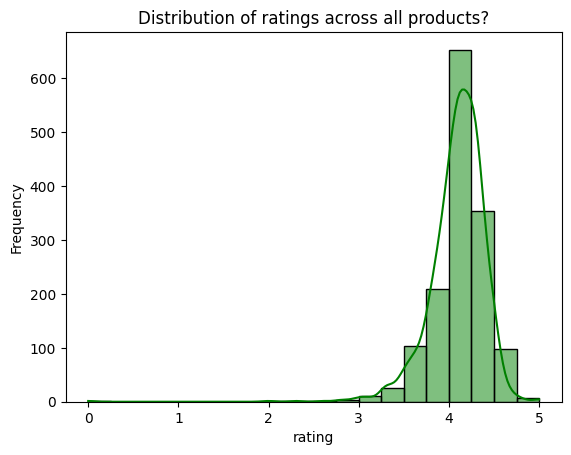

In [53]:
sns.histplot(df, x = "rating", bins = 20, kde = True, color = "green")
plt.title("Distribution of ratings across all products?")
plt.ylabel("Frequency")
plt.show()

Based on the histogram showing the distribution of Amazon product ratings, it appears that the majority of products have received ratings between 4 and 5. The frequency of ratings decreases as the rating value decreases, with very few products having ratings below 3. Overall, the distribution suggests that most products on Amazon have received positive ratings, particularly in the 4 to 5 range.

# Product Analysis
Which product has the highest number of reviews and what is its rating?


In [54]:
phr = df.groupby("product_id")["product_id"].value_counts().to_frame().sort_values(by = "count", ascending = False)


In [55]:
phr.reset_index(inplace = True)


In [56]:
phrtop = phr[phr["count"] == 3]
finalphrtop = df[df["product_id"].isin(list(phrtop["product_id"]))]
finalphrtop

,product_id,product_name,category_with_subcategory,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category
179,B01GGKYKQM,Amazon Basics USB Type-C to USB-A 2.0 Male Fas...,Computers&Accessories|Accessories&Peripherals|...,219.0,700.0,69.0,4.3,20053.0,"Connect USB Type-C enabled devices (MacBook, C...","AHVZCQP5SYIVGZJK4LRP55ZXWETA,AF6YDBL3KYIK3LBKK...","Hremant,Anjaneyulu,Madhav,NOTTADRIS,Deepak,P,M...","R1BC08IFG4REKS,R1FJKIHIO54SOW,R3JR48W2CI480,R3...","You can trust on this one,The best usb cable,W...",Previously bought amazon basic USB type A cabl...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/AmazonBasics-Type-C-USB-...,Computers&Accessories
180,B01GGKYKQM,Amazon Basics USB Type-C to USB-A 2.0 Male Fas...,Computers&Accessories|Accessories&Peripherals|...,219.0,700.0,69.0,4.3,20052.0,"Connect USB Type-C enabled devices (MacBook, C...","AHVZCQP5SYIVGZJK4LRP55ZXWETA,AF6YDBL3KYIK3LBKK...","Hremant,Anjaneyulu,Madhav,NOTTADRIS,Deepak,P,M...","R1BC08IFG4REKS,R1FJKIHIO54SOW,R3JR48W2CI480,R3...","You can trust on this one,The best usb cable,W...",Previously bought amazon basic USB type A cabl...,https://m.media-amazon.com/images/I/31-BRsjrvD...,https://www.amazon.in/AmazonBasics-Type-C-USB-...,Computers&Accessories
181,B01GGKYKQM,Amazon Basics USB Type-C to USB-A 2.0 Male Fas...,Computers&Accessories|Accessories&Peripherals|...,219.0,700.0,69.0,4.3,20053.0,"Connect USB Type-C enabled devices (MacBook, C...","AHVZCQP5SYIVGZJK4LRP55ZXWETA,AF6YDBL3KYIK3LBKK...","Hremant,Anjaneyulu,Madhav,NOTTADRIS,Deepak,P,M...","R1BC08IFG4REKS,R1FJKIHIO54SOW,R3JR48W2CI480,R3...","You can trust on this one,The best usb cable,W...",Previously bought amazon basic USB type A cabl...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/AmazonBasics-Type-C-USB-...,Computers&Accessories
273,B077Z65HSD,boAt A400 USB Type-C to USB-A 2.0 Male Data Ca...,Computers&Accessories|Accessories&Peripherals|...,299.0,999.0,70.0,4.3,20850.0,2 meter special reversible Type-C to USB A mal...,"AFA332YHUPB6I7KMME7SOFX5RKQQ,AH3LHRL5P4YAVOQQC...","GHOST,Amazon Customer,A Vase,Mani Jha,Anu B,Ga...","R1G4I5FLAHM16P,R1DXRMVWV2OVE8,R2BJFG3I9TAZ2P,R...","Just buy it dont even 2nd guess it,Quality is ...","One amazing cable for 300 bucks,Ok with chargi...",https://m.media-amazon.com/images/I/41jk4zYjTs...,https://www.amazon.in/A400-Type-C-Cable-Meter-...,Computers&Accessories
274,B077Z65HSD,boAt A400 USB Type-C to USB-A 2.0 Male Data Ca...,Computers&Accessories|Accessories&Peripherals|...,299.0,999.0,70.0,4.3,20850.0,2 meter special reversible Type-C to USB A mal...,"AH3LHRL5P4YAVOQQCH72G2PJFXSA,AFA332YHUPB6I7KMM...","Amazon Customer,GHOST,A Vase,Ganesh Inguva,Man...","R1DXRMVWV2OVE8,R1G4I5FLAHM16P,R2BJFG3I9TAZ2P,R...","Quality is good,Just buy it dont even 2nd gues...",Ok with charging. Looks very sturdy and durabl...,https://m.media-amazon.com/images/I/41jk4zYjTs...,https://www.amazon.in/A400-Type-C-Cable-Meter-...,Computers&Accessories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,B09W5XR9RT,Duracell USB C To Lightning Apple Certified (M...,Computers&Accessories|Accessories&Peripherals|...,970.0,1999.0,51.0,4.4,184.0,1.2M Tangle Free durable tough braiding sync &...,"AHZWJCVEIEI76H2VGMUSN5D735IQ,AH2DFUHFTG4CKQFVG...","Amazon Customer,Govind Gujarathi,Vihari,shalem...","R1Y30KU04V3QF4,RK3DSUGKIZT8Z,R3BIG7J6V2JZTU,R1...","Very good product.,Using as a spare cable in c...","Fast charging.,Cable seems to be of good quali...",https://m.media-amazon.com/images/I/4177nw8okb...,https://www.amazon.in/Duracell-Lightning-Certi...,Computers&Accessories
1167,B09W5XR9RT,Duracell USB C To Lightning Apple Certified (M...,Computers&Accessories|Accessories&Peripherals|...,970.0,1999.0,51.0,4.4,184.0,1.2M Tangle Free durable tough braiding sync &...,"AHZWJCVEIEI76H2VGMUSN5D735IQ,AH2DFUHFTG4CKQFVG...","Amazo

In [57]:
finalphrtopplt = finalphrtop.groupby("product_id")["rating"].mean().to_frame().reset_index().sort_values(by = "rating", ascending = False)
finalphrtopplt

,product_id,rating
16,B09C6HXFC1,4.5
20,B09W5XR9RT,4.4
3,B07XLCFSSN,4.4
5,B083342NKJ,4.4
9,B08DDRGWTJ,4.3
1,B077Z65HSD,4.3
0,B01GGKYKQM,4.3
4,B082T6V3DT,4.3
8,B08CF3D7QR,4.3
7,B08CF3B7N1,4.2


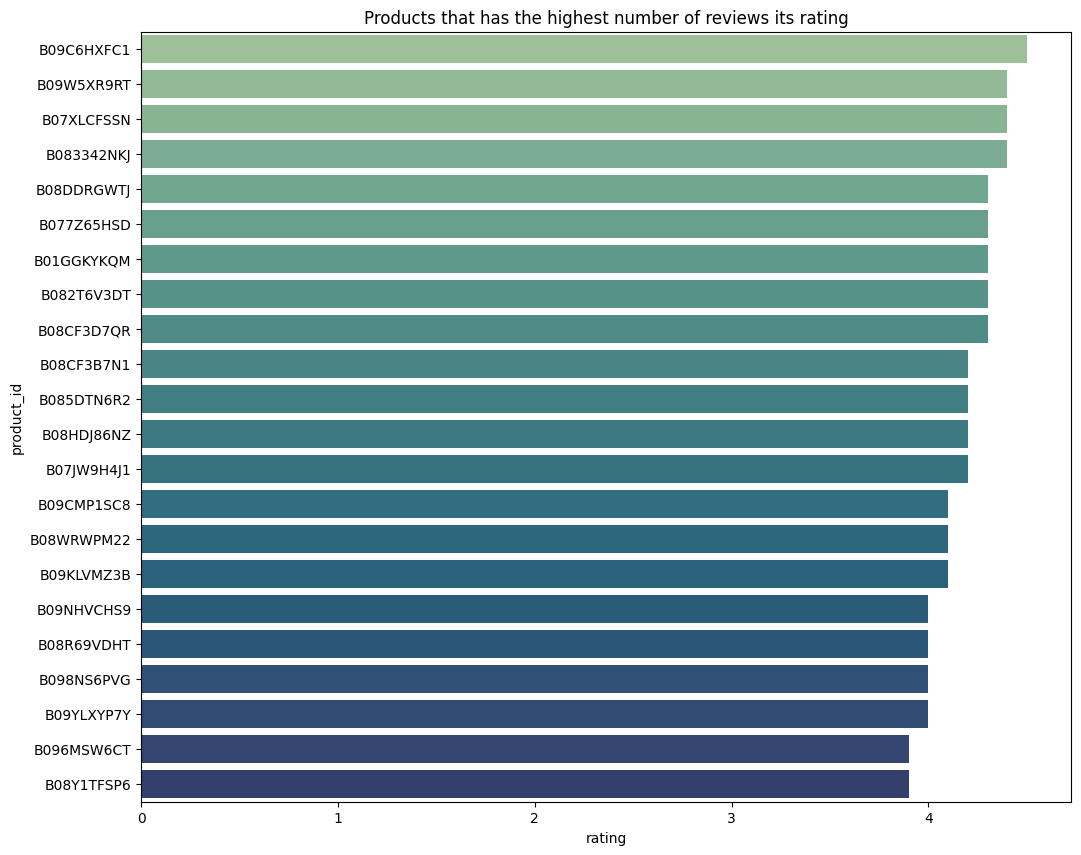

In [58]:
plt.figure(figsize = (12,10))
sns.barplot(finalphrtopplt, x= "rating", y = "product_id", palette="crest")
plt.title("Products that has the highest number of reviews its rating")
plt.show()

Ratings range from 3.9 to 4.5, indicating varying levels of customer satisfaction. Notably, the highest-rated product is at 4.5, while the lowest stands at 3.9. Multiple products share the same rating, suggesting consistency in customer sentiment across items.

# User Analysis
Identify the top 5 users who have given the most reviews.


In [59]:
import itertools
user_ids = list(itertools.chain.from_iterable(df['user_id'].str.split(',')))

In [60]:
pd.Series(user_ids).value_counts()[:6]

AG5DWPD54QGSLWJ6QUFERLPNAX4Q    11
AE55KTFVNXYFD5FPYWP2OUPEYNPQ    11
AF355FTXYAKFH5NYPRTE7SL3WO3Q    10
AECPFYFQVRUWC3KGNLJIOREFP5LQ    10
AEAMIR3CMSA32IDEINSJKHRNANTA    10
AFHROSCGIXUPV3FYQ7H5QOD46Q7Q    10
Name: count, dtype: int64

It reveals the top 5 users who have provided the most reviews on Amazon. Two users have each contributed 11 reviews, while three users have submitted 10 reviews each. These active reviewers play a significant role in shaping the platform's feedback and influencing other users' purchasing decisions.

# Review Length Analysis
Is there a correlation between the length of a review and the rating given?

In [61]:
df["review_length"] =  df["review_content"].str.len()
df.head(1)

,product_id,product_name,category_with_subcategory,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category,review_length
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,507.0,1208.0,58.0,4.1,8131.0,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...,Computers&Accessories,483


In [62]:
df["review_length"].corr(df["rating"])

0.06815599660788828

The coefficient correlation 0.06815599660788828 is close to no correlation.

# Product Description Analysis
Can the length of the product description be correlated to the product's rating?

In [63]:
df["about_product_length"] = df["about_product"].str.len()
df.head(1)

,product_id,product_name,category_with_subcategory,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category,review_length,about_product_length
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,507.0,1208.0,58.0,4.1,8131.0,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...,Computers&Accessories,483,386


In [64]:
df["about_product_length"].corr(df["rating"])

0.03704502940867615

The coefficient correlation 0.03704502940867615 is close to no correlation.

# Conclusion


In conclusion, the analysis of the Amazon dataset reveals several significant findings. Firstly, there exists a negative correlation between discount percentage and product rating, indicating that as discounts increase, there is a slight decrease in average product ratings. Additionally, the 'OfficeProducts' category stands out with the highest average rating, signifying notable customer satisfaction within this category. While a weak positive correlation between price and rating suggests that higher-priced products may receive slightly higher ratings, the predominant distribution of ratings between 4 and 5 underscores the prevalence of positive feedback. Products exhibit consistent ratings ranging from 3.9 to 4.5, with top reviewers playing a significant role in shaping feedback on the platform. Moreover, minimal correlation is observed between review length, product description length, and product rating. These insights offer valuable guidance for strategic decisions in product management and customer satisfaction strategies on Amazon.